In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.plots import *
from fastai.io import get_data

ModuleNotFoundError: No module named 'fastai.plots'

In [ ]:
PATH = "data/fish/"

In [ ]:
!ls {PATH}

In [ ]:
!ls {PATH}train

In [ ]:
files = !ls {PATH}train/ALB | head
files

In [ ]:
img = plt.imread(f'{PATH}train/ALB/{files[0]}')
plt.imshow(img);

In [ ]:
from os import listdir
from os.path import join
train_path = f'{PATH}/train'

In [ ]:
dirs = [d for d in listdir(train_path) if os.path.isdir(join(train_path,d))]
print(dirs)

In [ ]:
train_dict = {d: listdir(join(train_path, d)) for d in dirs}

In [ ]:
train_dict["LAG"][:10]

In [ ]:
sum(len(v) for v in train_dict.values())

In [ ]:
with open(f"{PATH}train.csv", "w") as csv:
    csv.write("img,label\n")
    for d in dirs:
        for f in train_dict[d]: csv.write(f'{f},{d}\n')

In [ ]:
img_path = f'{PATH}images'
os.makedirs(img_path, exist_ok=True)

In [ ]:
!cp {PATH}train/*/*.jpg {PATH}images/

In [15]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

/home/lamin-banani/anaconda3/envs/fastai/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [16]:
sz=350
bs=32
csv_fname = os.path.join(PATH, "train.csv")
train_labels = list(open(csv_fname))
n = len(list(open(csv_fname)))-1
val_idxs = get_cv_idxs(n)

In [17]:
tfms = tfms_from_model(resnet34, sz)
data = ImageClassifierData.from_csv(PATH, "images", csv_fname, bs, tfms, val_idxs)

In [18]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True, opt_fn=optim.Adam, ps=0.5)

/home/lamin-banani/anaconda3/envs/fastai/lib/python3.8/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [19]:
lrf=learn.lr_find()
# learn.sched.plot()

epoch      trn_loss   val_loss   accuracy                 
    0      3.681352   1166.243618 0.089888  



In [20]:
learn.fit(0.01, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      2.479538   2.442722   0.539326  
    1      1.677583   1.324335   0.775281                 
    2      1.275995   1.099013   0.730337                 
    3      1.043626   0.943583   0.775281                
    4      0.870938   0.801458   0.786517                  
    5      0.748334   0.799104   0.786517                  
    6      0.601101   0.793722   0.797753                  
    7      0.522004   1.04161    0.775281                  
    8      0.459626   1.068786   0.786517                 
    9      0.407086   0.849154   0.797753                  
    10     0.361277   0.787963   0.820225                  
    11     0.343508   0.891701   0.831461                  
    12     0.309158   0.939622   0.820225                  
    13     0.287989   0.938251   0.820225                  
    14     0.259272   0.904202   0.831461                  



[0.9042019630164913, 0.8314606741573034]

In [21]:
lrs=np.array([1e-4,1e-3,1e-2])
learn.precompute=False

learn.freeze_to(6)
# lrf=learn.lr_find(lrs/1e3)
# # learn.sched.plot()

In [22]:
sz = 350
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO)
data = ImageClassifierData.from_csv(PATH, "images", csv_fname, bs, tfms, val_idxs)

In [23]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True, opt_fn=optim.Adam, ps=0.5)

In [24]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy                 
    0      4.626876   872.606226 0.404494  



In [25]:
learn.fit(0.01, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      2.588051   2.167327   0.685393  
    1      1.778115   1.098091   0.730337                 
    2      1.320521   0.884125   0.752809                 
    3      1.063989   0.797753   0.786517                 
    4      0.904013   0.803644   0.820225                 
    5      0.721211   0.725136   0.820225                  
    6      0.601457   0.715085   0.820225                  
    7      0.533835   0.914173   0.797753                  
    8      0.472563   0.908237   0.853933                  
    9      0.439174   0.80319    0.853933                  
    10     0.397965   0.836314   0.842697                  
    11     0.344385   0.906621   0.853933                  
    12     0.310829   0.868577   0.853933                  
    13     0.275806   0.818376   0.842697                  
    14     0.255673   0.833      0.842697                  



[0.8329995762807935, 0.8426966292134831]

In [26]:
lrs=np.array([1e-4,1e-3,1e-2])
learn.precompute=False

learn.unfreeze()
lrf=learn.lr_find(lrs/1e3)

epoch      trn_loss   val_loss   accuracy                 
    0      8.452562   1.2176617101164541e+27 0.168539  



In [27]:
# lrs=np.array([1e-5,1e-4,1e-3])
# learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [28]:
import json
anno_classes = ['alb', 'bet', 'dol', 'lag', 'other', 'shark', 'yft', 'bon']

In [29]:
def get_annotations():
    annot_urls = [
        '5458/bet_labels.json', '5459/shark_labels.json', '5460/dol_labels.json',
        '5461/yft_labels.json', '5462/alb_labels.json', '5463/lag_labels.json'
    ]
    cache_subdir = os.path.abspath(os.path.join(PATH, 'annos'))
    url_prefix = 'https://storage.googleapis.com/kaggle-forum-message-attachments/147157/'
    os.makedirs(cache_subdir, exist_ok=True)
    
    for url_suffix in annot_urls:
        fname = url_suffix.rsplit('/', 1)[-1]
        get_data(url_prefix + url_suffix, f'{cache_subdir}/{fname}')

In [30]:
# get the annotation files
get_annotations()

In [31]:
bb_json = {}
for c in anno_classes:
    if c == 'other': continue # no annotation file for "other" class
    j = json.load(open(f'{PATH}annos/{c}_labels.json', 'r'))
    for l in j:
        if 'annotations' in l.keys() and len(l['annotations'])>0:
            bb_json[l['filename'].split('/')[-1]] = sorted(
                l['annotations'], key=lambda x: x['height']*x['width'])[-1]
bb_json['img_04908.jpg']

{'class': 'rect',
 'height': 246.75000000000074,
 'width': 432.8700000000013,
 'x': 465.3000000000014,
 'y': 496.32000000000147}

In [32]:
raw_filenames = pd.read_csv(csv_fname)["img"].values

In [33]:
file2idx = {o:i for i,o in enumerate(raw_filenames)}

empty_bbox = {'height': 0., 'width': 0., 'x': 0., 'y': 0.}
for f in raw_filenames:
    if not f in bb_json.keys(): bb_json[f] = empty_bbox

bb_params = ['height', 'width', 'x', 'y']
def convert_bb(bb):
    bb = [bb[p] for p in bb_params]
    bb[2] = max(bb[2], 0)
    bb[3] = max(bb[3], 0)
    return bb

In [34]:
trn_bbox = np.stack([convert_bb(bb_json[f]) for f in raw_filenames]).astype(np.float32)
trn_bb_labels = [f + ',' + ' '.join(map(str,o))+'\n' for f,o in zip(raw_filenames,trn_bbox)]

In [35]:
open(f'{PATH}trn_bb_labels', 'w').writelines(trn_bb_labels)

In [36]:
names,csv_labels= parse_csv_labels(f'{PATH}trn_bb_labels', skip_header=False)

In [37]:
def bb_corners(bb):
    bb = np.array(bb, dtype=np.float32)
    row1 = bb[3]
    col1 = bb[2]
    row2 = row1 + bb[0]
    col2 = col1 + bb[1]
    return [row1, col1, row2, col2]


In [38]:
f = 'img_00029.jpg'
bb = csv_labels[f]
print(bb)
bb_corners(bb)

['300.0', '259.0', '816.0', '248.0']


[248.0, 816.0, 548.0, 1075.0]

In [39]:
new_labels = [f + "," + " ".join(map(str, bb_corners(csv_labels[f]))) + "\n" for f in raw_filenames]

In [40]:
open(f'{PATH}trn_bb_corners_labels', 'w').writelines(new_labels)

# Looking at bounding boxes

In [41]:
# reading bb file
bbox = {}
bb_data = pd.read_csv(f'{PATH}trn_bb_labels', header=None)

In [42]:
fnames,csv_labels= parse_csv_labels(f'{PATH}trn_bb_labels', skip_header=False)
fnames,corner_labels= parse_csv_labels(f'{PATH}trn_bb_corners_labels', skip_header=False)

In [43]:
corner_labels["img_01450.jpg"]

['519.0', '637.0', '783.0', '941.0']

In [44]:
csv_labels["img_00583.jpg"]

['423.0', '169.0', '216.0', '247.0']

In [45]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[2], bb[3]), bb[1], bb[0], color=color, fill=False, lw=3)

def show_bb(path, f='img_04908.jpg'):
    file_path = f'{path}images/{f}'
    bb = csv_labels[f]
    plots_from_files([file_path])
    plt.gca().add_patch(create_rect(bb))

In [46]:
def create_corner_rect(bb, color='red'):
    bb = np.array(bb, dtype=np.float32)
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color, fill=False, lw=3)

def show_corner_bb(path, f='img_04908.jpg'):
    file_path = f'{path}images/{f}'
    bb = corner_labels[f]
    plots_from_files([file_path])
    plt.gca().add_patch(create_corner_rect(bb))

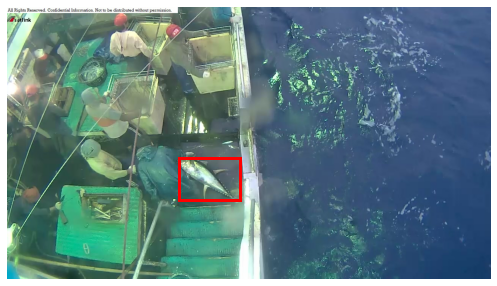

In [47]:
show_corner_bb(PATH, f = 'img_00778.jpg')

# Model predicting bounding boxes

In [48]:
sz=299
bs=32

label_csv=f'{PATH}trn_bb_corners_labels'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [49]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD)
data = ImageClassifierData.from_csv(PATH, 'images', label_csv, tfms=tfms, val_idxs=val_idxs,
                                    continuous=True, skip_header=False)

In [50]:
trn_ds = data.trn_dl.dataset

In [51]:
x, y = trn_ds[0]

In [52]:
print(x.shape, y)

(3, 299, 299) [144. 129. 224. 221.]


In [53]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True, opt_fn=optim.Adam, ps=0.5)

In [54]:
lrf=learn.lr_find()
# learn.sched.plot()

epoch      trn_loss   val_loss                         
    0      393.196836 1086.993656



In [55]:
learn.fit(0.01, 5, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                         
    0      391.573575 379.965437
    1      391.925124 380.084755                       
    2      391.854432 380.491482                       
    3      392.447929 376.909835                       
    4      389.649013 372.110882                       
    5      388.280991 369.094061                       
    6      387.047652 368.530523                       
    7      384.798458 355.138191                       
    8      379.844326 336.504454                       
    9      373.76474  314.920819                       
    10     366.241617 296.071962                       
    11     357.658309 282.867975                       
    12     349.010904 275.658996                       
    13     341.337906 271.942512                       
    14     334.056674 272.475551                       
    15     325.270231 237.573429                       
    16     313.979975 203.314181                       
    17     299.

[128.72702232103669]

In [56]:
lrs=np.array([1e-4,1e-3,1e-2])
learn.precompute=False

learn.unfreeze()
lrf=learn.lr_find(lrs/1e3)
# learn.sched.plot()

epoch      trn_loss   val_loss                         
    0      277.350164 1.8207270002363613e+21



In [57]:
lrs=np.array([1e-5,1e-4,1e-3])
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                         
    0      279.956771 202.243967
    1      278.279599 143.393391                       
    2      275.707742 182.639963                       
    3      272.746301 200.41044                        
    4      270.205023 216.663662                       
    5      267.950398 235.076796                       
    6      265.090471 248.442768                       
    7      263.204473 258.857903                       
    8      261.070833 259.519533                       
    9      257.947269 261.219466                       
    10     254.99801  262.894909                       
    11     252.286154 257.26558                        
    12     249.882964 251.675374                       
    13     247.746874 245.302167                       
    14     245.594748 241.241083                       
    15     243.36807  229.261158                       
    16     241.34947  225.105468                       
    17     238.

[203.54498942514485]

In [58]:
f="img_00030.jpg"
PIL.Image.open(PATH+"images/" + f).size

(227, 222)

In [59]:
sizes = [PIL.Image.open(PATH+f).size for f in data.trn_ds.fnames]
raw_val_sizes = [PIL.Image.open(PATH+f).size for f in data.val_ds.fnames]

In [60]:
#  def export(self, file:Path='export.pkl', destroy=False):
#         "Export the state of the `Learner` in `self.path/file`. `file` can be file-like (file or buffer)"
#         if rank_distrib(): return # don't save if slave proc
#         args = ['opt_func', 'loss_func', 'metrics', 'true_wd', 'bn_wd', 'wd', 'train_bn', 'model_dir', 'callback_fns']
#         state = {a:getattr(self,a) for a in args}
#         state['cb_state'] = {cb.__class__:cb.get_state() for cb in self.callbacks}
#         #layer_groups -> need to find a way
#         #TO SEE: do we save model structure and weights separately?
#         with ModelOnCPU(self.model) as m:
#             state['model'] = m
#             xtra = dict(normalize=self.data.norm.keywords) if getattr(self.data, 'norm', False) else {}
#             state['data'] = self.data.valid_ds.get_state(**xtra)
#             state['cls'] = self.__class__
#             try_save(state, self.path, file)
#         if destroy: self.destroy()

In [62]:
learn.export()

AttributeError: 'ConvLearner' object has no attribute 'export'